# Video Game Success Patterns/Trends

> Using open-source data on game sales, ratings, genres ,and platforms, we will identify patterns that determine the success of a video game. This will help with planning future advertising campaigns.

- toc: true
- badges: true
- comments: true
- categories: [Python, exploratory analysis, statistical analysis, data preprocessing, product analysis, pandas, numpy, mathplotlib, scripy, seaborn]
- image: images/game-over.png

# Project description

User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. You need to identify patterns that determine whether a game succeeds or not. This will allow you to spot potential big winners and plan advertising campaigns.

In front of you is data going back to 2016. Let’s imagine that it’s December 2016 and you’re planning a campaign for 2017.

(The important thing is to get experience working with data. It doesn't really matter whether you're forecasting 2017 sales based on data from 2016 or 2027 sales based on data from 2016.)

The dataset contains the abbreviation ESRB. The Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature.


## Data description

Data is from open sources 2016 - historical game sales data: user and expert ratings, country sales, genres and platforms, ESRB ratings

* `Name` - the name of the game
* `Platform` - platform
* `Year_of_Release` - release year
* `Genre` - game genre
* `NA_sales` - sales in North America (millions of copies sold)
* `EU_sales` - sales in Europe (millions of copies sold)
* `JP_sales` - sales in Japan (millions of copies sold)
* `Other_sales` - sales in other countries (millions of copies sold)
* `Critic_Score` - critic scores (maximum 100)
* `User_Score` - user rating (maximum 10)
* `Rating` - rating by the ESRB (Entertainment Software Rating Board), which determines the rating of the game and the appropriate age category

# Import Libraries


In [ ]:
#collapse-output
# Import in libraries to use in project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from scipy import stats as st
import seaborn as sns
import matplotlib.ticker as ticker
import seaborn.apionly as sns

/opt/conda/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/opt/conda/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/opt/conda/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/opt/conda/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/opt/conda/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 

# Load Data

In [ ]:
#collapse-hide
# Functions to get descriptions and info from dataframe

def get_information(df):
  """ Prints general info about the dataframe to get an idea of what it looks like"""
  print('Head: \n')
  display(df.head())
  print('*'*100, '\n') # Prints a break to seperate print data
  
  print('Info: \n')
  display(df.info())
  print('*'*100, '\n')

  print('Describe: \n')
  display(df.describe())
  display(df.describe(include='object'))
  print('*'*100, '\n')

  print('Columns with nulls: \n')
  display(get_null_df(df,4))
  print('*'*100, '\n')

  print('Shape: \n')
  display(df.shape)
  print('*'*100, '\n')

  print('Duplicated: \n')
  print('Number of duplicated rows: {}'.format(df.duplicated().sum()))

def get_null_df(df, num):
  """Gets percentage of null values per column per dataframe"""
  df_nulls = pd.DataFrame(df.isna().sum(), columns=['missing_values'])
  df_nulls['percent_of_nulls'] = round(df_nulls['missing_values'] / df.shape[0], num) *100
  return df_nulls

def get_null(df):
  """Gets percentage of null values in dataframe"""
  count = 0
  df = df.copy()
  s = (df.isna().sum() / df.shape[0])
  for column, percent in zip(s.index, s.values):

    num_of_nulls = df[column].isna().sum()
    if num_of_nulls == 0:
      continue
    else:
      count += 1
    print('Columns {} has {:.{}%} percent of Nulls, and {} number of nulls'.format(column, percent, num, num_of_nulls))

    if count !=0:
      print('Number of columns with NA: {}'.format(count))
    else:
      print('\nNo NA columns found')

In [ ]:
#collapse-output
df_games = pd.read_csv('/datasets/games.csv') # this is correct path

get_information(df_games)

Head: 



,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**************************************************************************************************** 

Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

**************************************************************************************************** 

Describe: 



,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


**************************************************************************************************** 

Columns with nulls: 



,missing_values,percent_of_nulls
Name,2,0.01
Platform,0,0.00
Year_of_Release,269,1.61
Genre,2,0.01
NA_sales,0,0.00
EU_sales,0,0.00
JP_sales,0,0.00
Other_sales,0,0.00
Critic_Score,8578,51.32
User_Score,6701,40.09


**************************************************************************************************** 

Shape: 



(16715, 11)

**************************************************************************************************** 

Duplicated: 

Number of duplicated rows: 0


`Columns Critic_Score`, `User_Score`, and `Rating` have a lot of null values, `Critic_Score` with about 51% null values, and `User_Score` and `Rating` having about 40% null values. These columns seem to have the most missing values. `Year_of_Release` have about 269 values missing but it is a small percentage compared the first three mentioned. The dataset has 16715 entries in total.

# Pre-process Data

## Replace the column names (make them lowercase)

In [ ]:
df_games.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [ ]:
df_games.columns = [columns.lower().replace(' ', '_') for columns in df_games.columns]
df_games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

## Convert data types and deal with missing values

In [ ]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


We have to keep in mind about specifying explicit values, as this may cause errors in real business tasks. Depending on the data and how many values are missing we might have to just drop the missing values or fill then in with our best judgement.

* `name` and `genre` are missing the 2 values and I believe we can leave these as N.

* `year_of_release` should be an int instead of a float and we need to replace some of the missing values in that column. 

* `critic_score` has a lot of missing values.

* `user_score` should be a float or int but again we have to deal with the missing values in this column or figure out how to deal with the TBD values.

* `rating` just like `critic_score` has a ton of missing values. 

In [ ]:
# Function for converting data types
def convert_to_type(df, column, type_value):
  """ Convert to columns to certain type values"""
  for col in column:
    df[col] = df[col].astype(type_value)

In [ ]:
# Dealing with name and genre columns
df_games['name'].fillna(np.nan, inplace=True)
df_games['genre'].fillna(np.nan, inplace=True)

convert_to_type(df_games, ['name'], str)
convert_to_type(df_games, ['genre'], str)

df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16715 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16715 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


`name` and `genre` missing values have been filled in with NAN (only 2 values missing).

In [ ]:
# Dealing with year_of_release column

# Grouping the data by platform and seeing the mean and median for the year_of_release
df_platform = df_games.groupby(['platform']).agg({'year_of_release':['mean', 'median']})
display(df_platform)

year_of_release        
                    mean  median
platform                        
2600         1982.137931  1982.0
3DO          1994.666667  1995.0
3DS          2013.126953  2013.0
DC           1999.942308  2000.0
DS           2008.185290  2008.0
GB           1995.958763  1997.0
GBA          2003.210851  2003.0
GC           2003.400369  2003.0
GEN          1993.034483  1993.0
GG           1992.000000  1992.0
N64          1998.531646  1999.0
NES          1987.153061  1986.5
NG           1994.500000  1994.5
PC           2008.914316  2010.0
PCFX         1996.000000  1996.0
PS           1998.005882  1998.0
PS2          2004.583921  2005.0
PS3          2010.840735  2011.0
PS4          2015.145408  2015.0
PSP          2008.731769  2009.0
PSV          2014.132867  2014.0
SAT          1996.028902  1996.0
SCD          1993.833333  1994.0
SNES         1993.845188  1994.0
TG16         1995.000000  1995.0
WS           2000.000000  2000.0
Wii          2008.966563  2009.0
WiiU         2013.659864  2013.0
X360         2009.880682  2010.0
XB           2003.636364  2004.0
XOne         2014.951417  2015.0

In [ ]:
# Looks like the median year_of_release might be a best choice to use to fill in the missing values per platform
df_platform_median = df_games.groupby(['platform']).agg({'year_of_release':'median'}).reset_index()

# Fill in NaN values in year_of_release with median year_of_release per platform
df_games.year_of_release = df_games.year_of_release.fillna(df_games.platform.map(df_platform_median.set_index('platform').year_of_release))
convert_to_type(df_games, ['year_of_release'], int)
df_games['year_of_release']

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16710    2016
16711    2006
16712    2016
16713    2003
16714    2016
Name: year_of_release, Length: 16715, dtype: int64

`year_of_release` missing values was filled in with median `year_of_release` per platform. This way at least the filled in missing values are a bit more tailored towards the game in regards to the platform. We were successful in converting the data type from float to int as well.

In [ ]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16715 non-null object
platform           16715 non-null object
year_of_release    16715 non-null int64
genre              16715 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


In [ ]:
# Dealing with critic_score column
df_critic_score = df_games.groupby(['genre']).agg({'critic_score':['mean', 'median', pd.Series.mode]})
display(df_critic_score)

print("Mean critic_score: ", df_games['critic_score'].mean())
print("Median critic_score", df_games['critic_score'].median())

critic_score                                 
                     mean median                      mode
genre                                                     
Action          66.629101   68.0                        71
Adventure       65.331269   66.0                        66
Fighting        69.217604   72.0                        74
Misc            66.619503   69.0                        73
Platform        68.058350   69.0                        71
Puzzle          67.424107   70.0                        75
Racing          67.963612   69.0                        82
Role-Playing    72.652646   74.0                        77
Shooter         70.181144   73.0  [72.0, 74.0, 78.0, 81.0]
Simulation      68.619318   70.0                        65
Sports          71.968174   75.0                        80
Strategy        72.086093   73.0              [69.0, 75.0]
nan                   NaN    NaN                        []

Mean critic_score:  68.96767850559173
Median critic_score 71.0


I feel like it's best to fill in with median `critic_score` per genre and for the NaN we can use the median overall `critic_score`. I am not sure if it makes much of a difference here if we used mean or median but looking at the mode for `critic_score` it seems like it would be best to use median as the mean seems a bit lower than expected comparing to the mode (which shows what is the most reoccuring `critic_score` in that genre).

In [ ]:
df_critic_score_median = df_games.groupby(['genre']).agg({'critic_score':'median'}).reset_index()

df_games.critic_score = df_games.critic_score.fillna(df_games.genre.map(df_critic_score_median.set_index('genre').critic_score))
df_games['critic_score'].fillna(np.nan, inplace=True)

df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16715 non-null object
platform           16715 non-null object
year_of_release    16715 non-null int64
genre              16715 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       16713 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


In [ ]:
# Dealing with user_score column

# Replacing TBD with NaN and converting to float data type
df_games['user_score'].replace(['tbd'], np.nan, inplace=True)
df_games['user_score'].fillna(np.nan, inplace=True)
convert_to_type(df_games, ['user_score'], float)

df_user_score = df_games.groupby(['genre']).agg({'user_score':['mean', 'median', pd.Series.mode]})
display(df_user_score)

print("Mean user_score: ", df_games['user_score'].mean())
print("Median user_score", df_games['user_score'].median())

user_score                             
                   mean median                  mode
genre                                               
Action         7.054044    7.4                     8
Adventure      7.133000    7.6                   8.2
Fighting       7.302506    7.6            [7.9, 8.5]
Misc           6.819362    7.1                   7.8
Platform       7.301402    7.7                   8.6
Puzzle         7.175000    7.5                   7.5
Racing         7.036193    7.4                   8.2
Role-Playing   7.619515    7.8                   8.2
Shooter        7.041883    7.4            [7.8, 8.2]
Simulation     7.134593    7.5  [7.3, 8.0, 8.2, 8.8]
Sports         6.961197    7.4                   7.8
Strategy       7.295177    7.8                   8.3
nan                 NaN    NaN                    []

Mean user_score:  7.125046113306982
Median user_score 7.5


The data for `user_score` has a similar pattern with mean, median, and mode as the `critic_score`. With the same logic, I think it's best to replace the missing values for user_score with median `user_score` per genre.

In [ ]:
df_user_score_median = df_games.groupby(['genre']).agg({'user_score':'median'}).reset_index()

df_games.user_score = df_games.user_score.fillna(df_games.genre.map(df_user_score_median.set_index('genre').user_score))

df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16715 non-null object
platform           16715 non-null object
year_of_release    16715 non-null int64
genre              16715 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       16713 non-null float64
user_score         16713 non-null float64
rating             9949 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
# Dealing with rating column

df_games['rating'].fillna(np.nan, inplace=True)

df_rating = df_games.groupby(['genre']).agg({'rating': pd.Series.mode}).reset_index()
df_rating

,genre,rating
0,Action,T
1,Adventure,E
2,Fighting,T
3,Misc,E
4,Platform,E
5,Puzzle,E
6,Racing,E
7,Role-Playing,T
8,Shooter,M
9,Simulation,E


Since rating is categorical we can't just use mean and median as easily. Mode might be a good filler here. We can used the mode for rating per genre to fill in the missing values.

In [ ]:
df_games.rating = df_games.rating.fillna(df_games.genre.map(df_rating.set_index('genre').rating))
convert_to_type(df_games, ['rating'], str)

df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16715 non-null object
platform           16715 non-null object
year_of_release    16715 non-null int64
genre              16715 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       16713 non-null float64
user_score         16713 non-null float64
rating             16715 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


## Calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column

In [ ]:
df_games['total_sales'] = df_games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
df_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,69.0,7.7,E,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,74.0,7.8,T,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,68.0,7.4,T,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,75.0,7.4,E,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,66.0,7.6,E,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,69.0,7.7,E,0.01


* Name of columns were converted to lowercase.
* `name` and `genre` missing values were placed by NaN (only 2 missing values)
* `year_of_release` missing values were filled with median `year_of_release` per platform and then converted data type to int.
* `critic_score` and `user_score` were filled with median values per genre. `user_score`'s TBD had to be changed to np.nan value and then filled. user_score also underwent a data type change to float. There are 2 missing values left as NaN and these seem to connect to the 2 missing name and genre. I believe having these values remain NaN is okay for later analysis.
* `rating` missing values were filled with the mode value per genre.
* `total_sales` is the sum of sales in all the regions of that game.

# Exploratory Data Analysis

## Number of games released in different years

In [ ]:
def get_annotation(ax):
  """Get annotation for graphs on top of bar graphs"""
  for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() * 1.005, p.get_height() * 1.05))

In [ ]:
# Grouping number of games to year_of_release

num_of_games_per_year = df_games.groupby(['year_of_release'])['name'].agg('count')
num_of_games_per_year

year_of_release
1980       9
1981      46
1982      53
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      62
1994     121
1995     219
1996     263
1997     290
1998     386
1999     341
2000     350
2001     482
2002     829
2003     800
2004     783
2005     973
2006    1006
2007    1197
2008    1457
2009    1476
2010    1302
2011    1161
2012     653
2013     552
2014     582
2015     606
2016     502
Name: name, dtype: int64

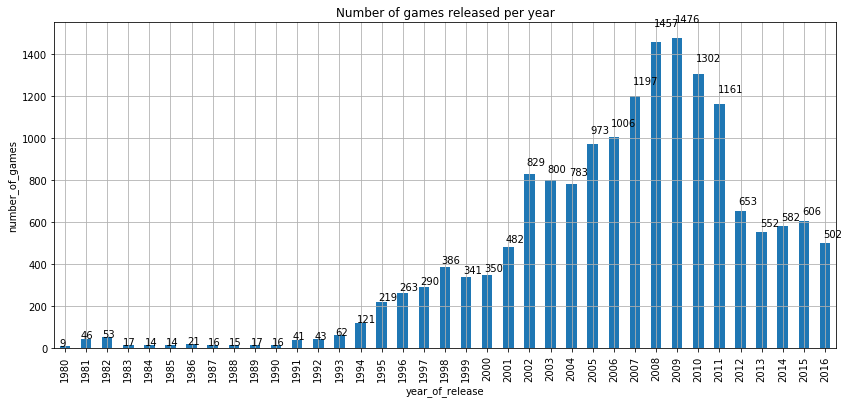

In [ ]:
get_annotation(num_of_games_per_year.plot(kind='bar', figsize=(14,6)))
plt.ylabel('number_of_games')
plt.title("Number of games released per year")
plt.grid(True)

In the 1980s to 1990s, there is a small amount of games released. Then there is a surge of games released passed 1994 where it seems to have an exponential growth of titles realeased. I have a feeling that this is due to release of home game consoles/platforms making more games more readily available. We can take a look at the consoles in each year to see if this is true. Though it's interesting as there is a number of games tapers off in 2011 and remains steady around 500-600 range of titles.

In [ ]:
df_games['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [ ]:
platform_per_year = df_games.groupby(['year_of_release'])['platform'].nunique()
platform_per_year

year_of_release
1980     1
1981     1
1982     1
1983     2
1984     2
1985     4
1986     2
1987     2
1988     4
1989     3
1990     4
1991     4
1992     6
1993     5
1994    10
1995     8
1996     8
1997     6
1998     7
1999     8
2000     9
2001    10
2002     8
2003     6
2004     7
2005     8
2006    10
2007    11
2008     9
2009     7
2010     7
2011     9
2012     9
2013    11
2014    10
2015    10
2016     9
Name: platform, dtype: int64

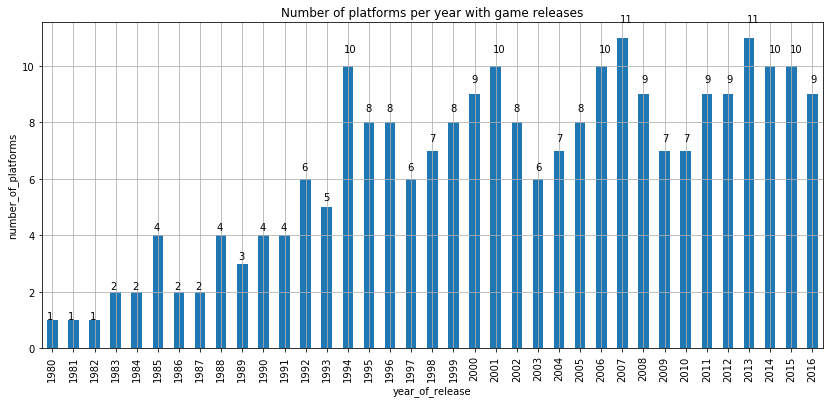

In [ ]:
get_annotation(platform_per_year.plot(kind='bar', figsize=(14,6)))
plt.ylabel('number_of_platforms')
plt.title("Number of platforms per year with game releases")
plt.grid(True)

As we saw from above, there is a height in number of platforms in 1994. It's interesting to note that perhaps platforms past this point have end-of-life around 5-6 years as there seems to be a peak for number of plaforms with games released around that time frame. Though, interesting like we saw previous with the number of games released at around 2011-2012, the numbers past this point seem to stablize compared to previous pattern observed.

## Change in sales per platform

In [ ]:
df_games.groupby('platform')['total_sales'].agg(sum).sort_values(ascending=False)

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       30.77
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

Top selling platforms include: PS2, X360, PS3, Wii, DS, and PS. We can do a quick graph comparison of all platforms game sales over time just to have a quick overview and mental note of the comparison, but it would be wise just to focus on analysis of these top selling platforms.

In [ ]:
def plot_bar(df, x, y, column='', value='', func=np.sum):
  if column != '' and value !='':
    filter_df = df[df[column] == value]
    plot_df = filter_df.pivot_table(index= x, values= y, aggfunc= func)
    values_to_plot = plot_df[y].values
  else:
    plot_df = df.pivot_table(index= x, values= y, aggfunc= func)
    values_to_plot = plot_df[y].values
  
  title = str(value) + ' - ' + str(y) + ' vs. ' + x
  ax = plot_df.plot(kind= 'bar', figsize=(14,6), rot=45, title=title, legend=False, grid=True)

  for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() * 1.005, p.get_height() * 1.05))

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


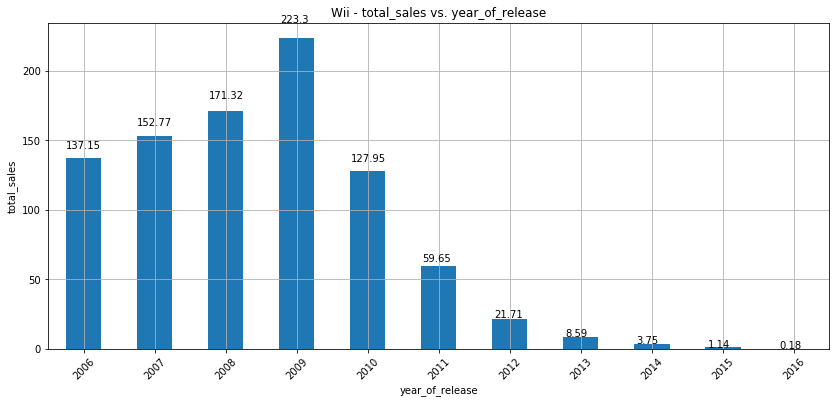

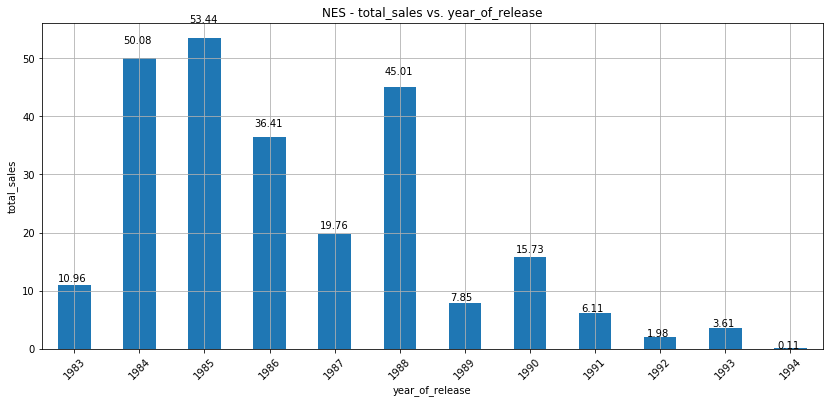

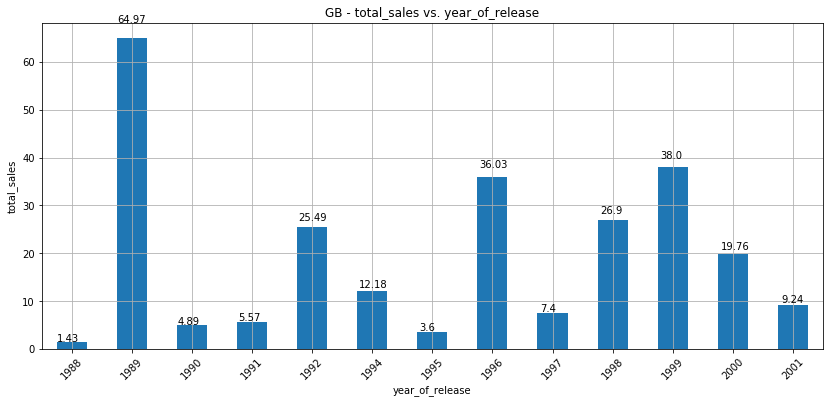

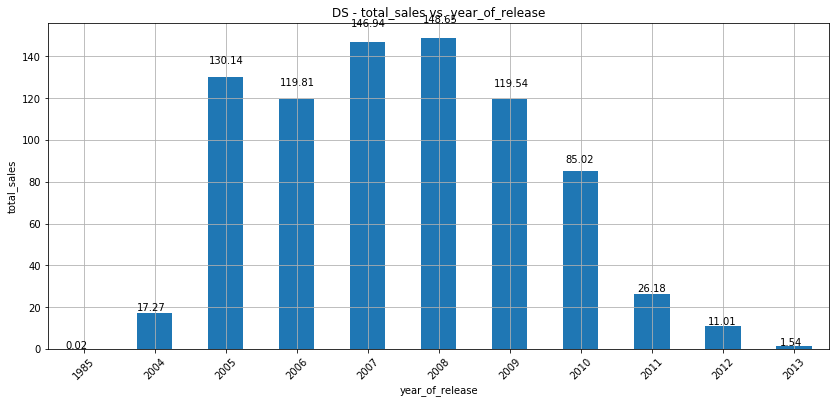

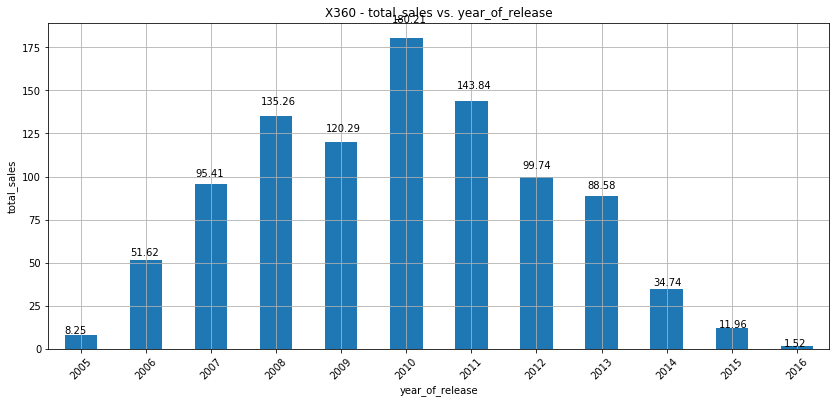

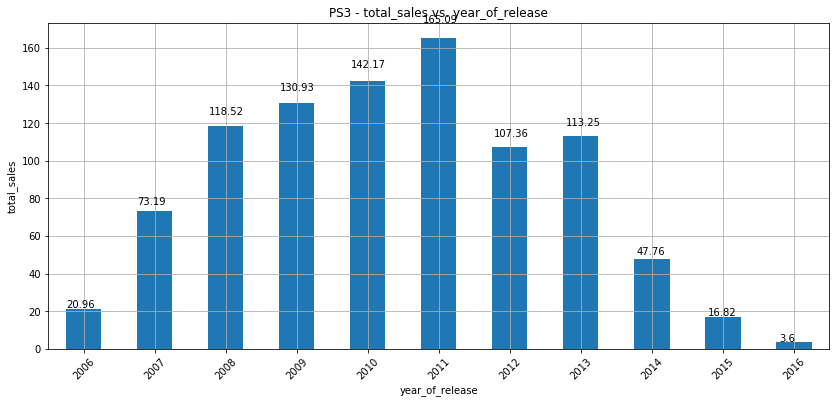

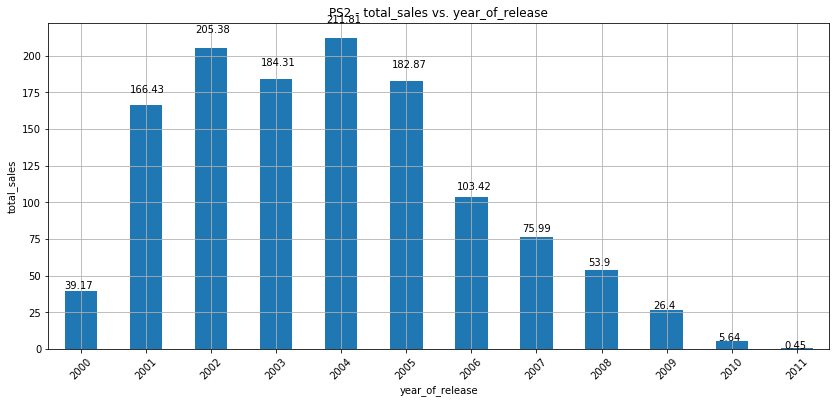

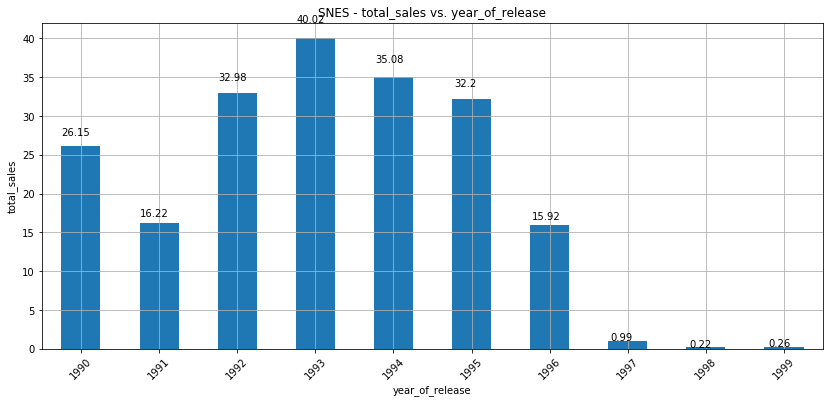

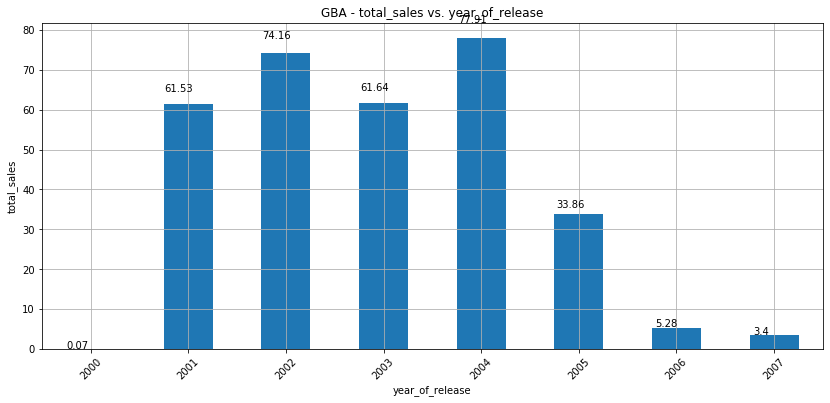

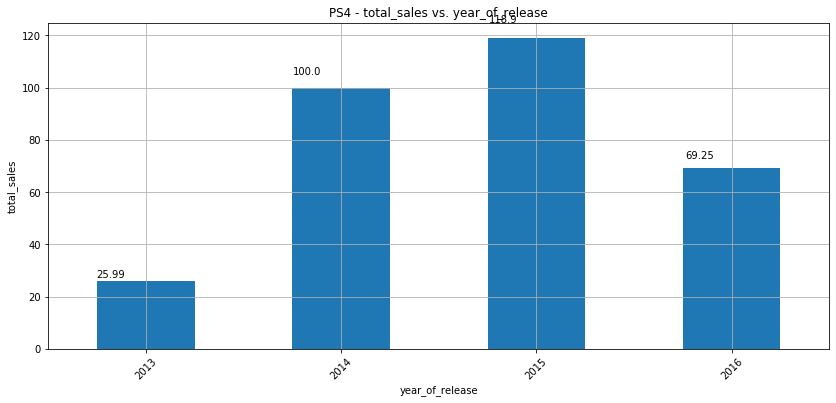

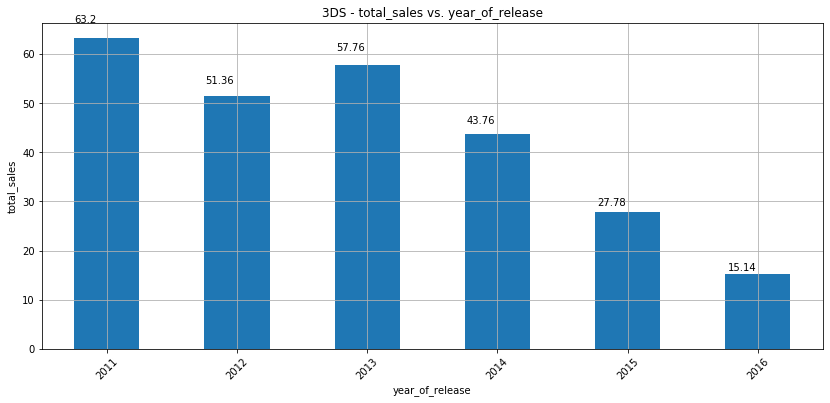

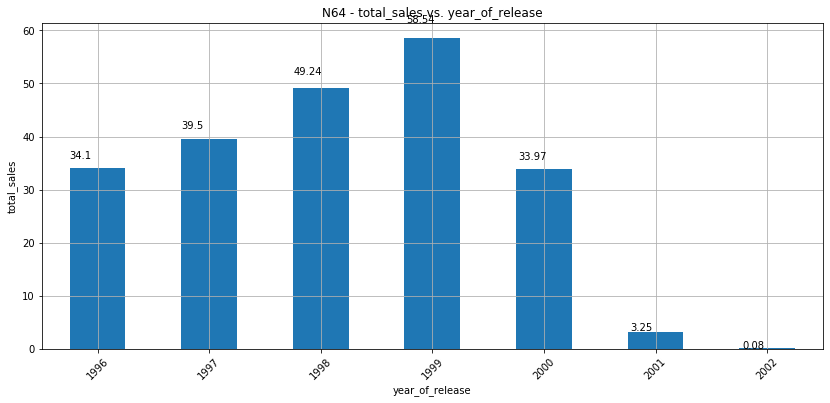

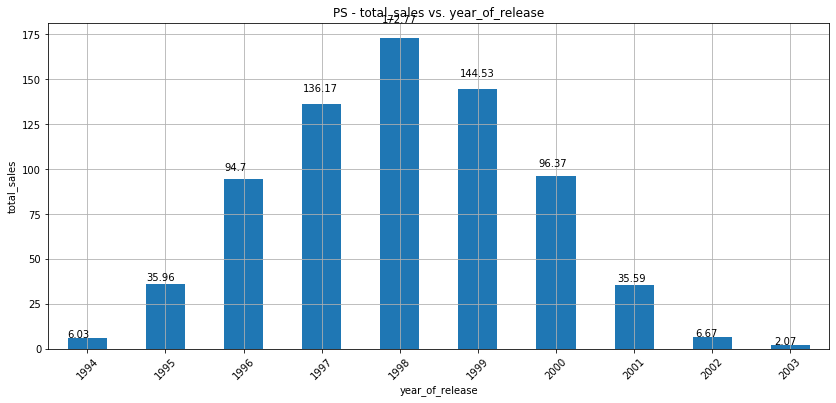

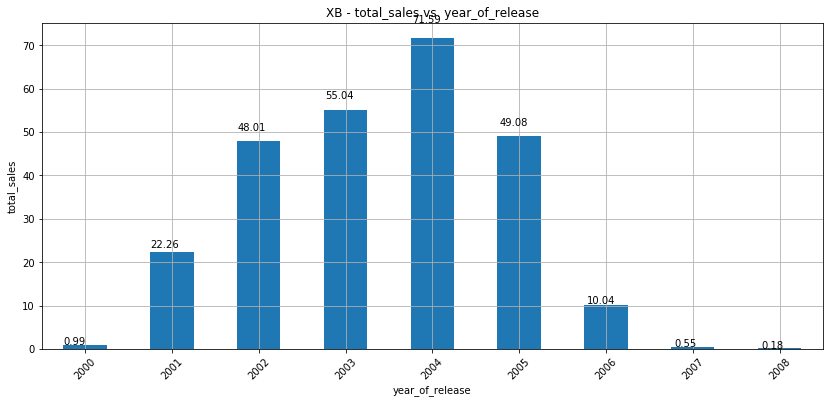

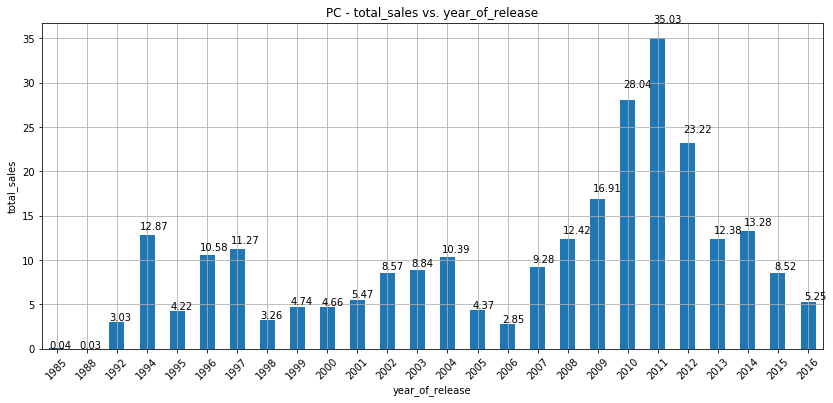

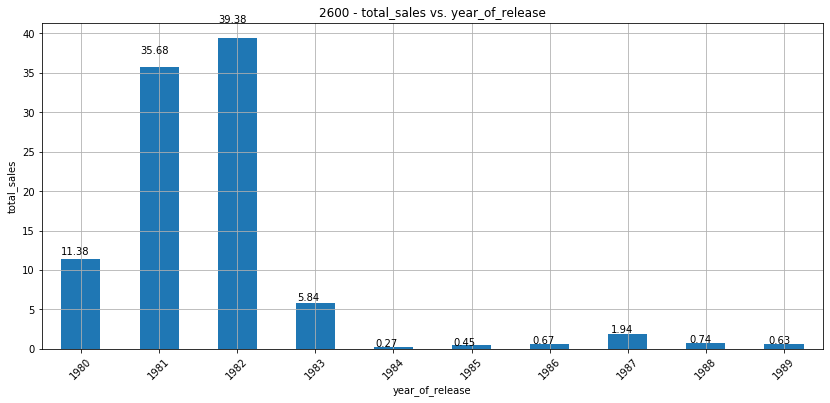

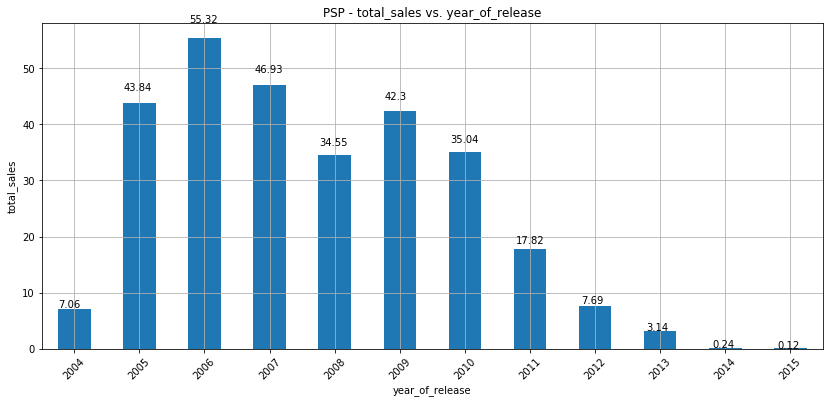

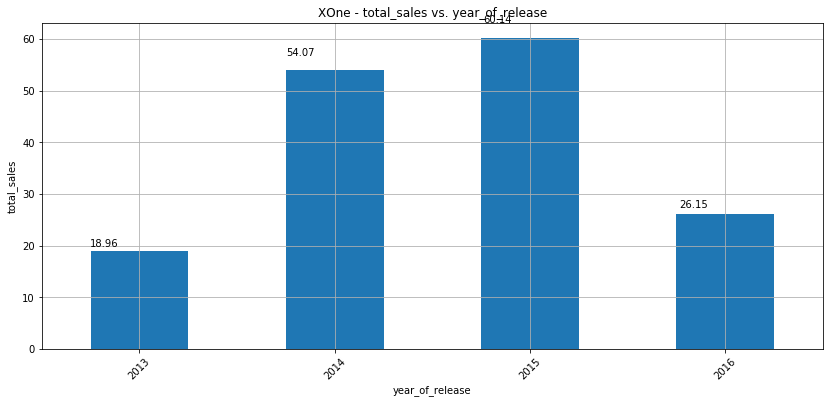

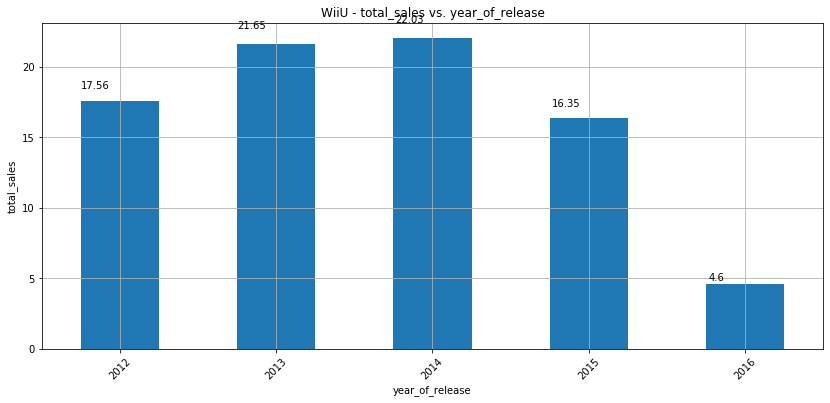

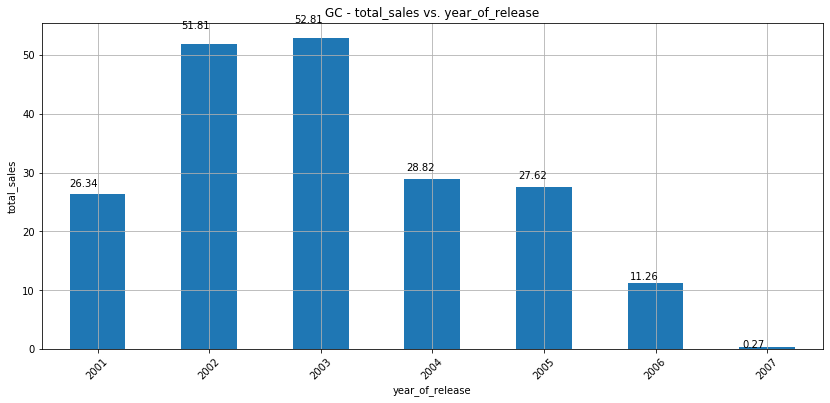

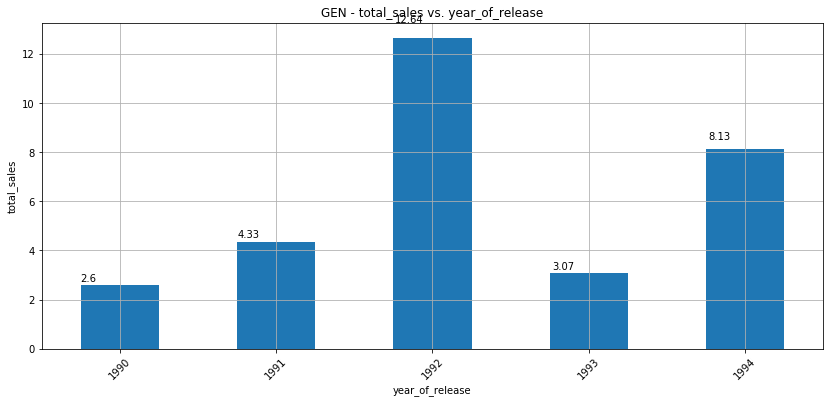

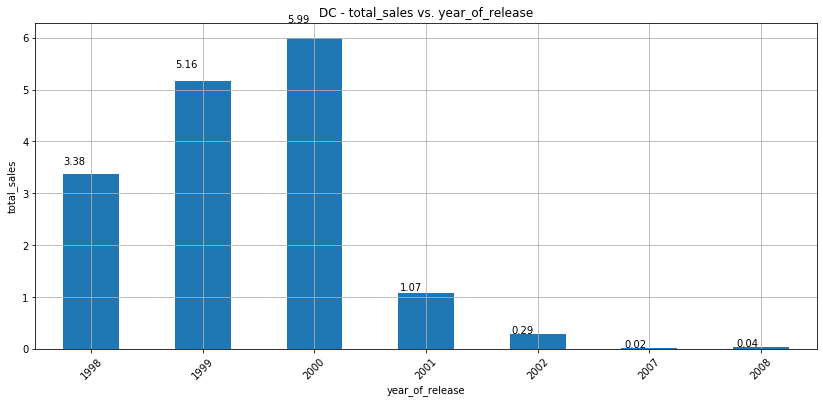

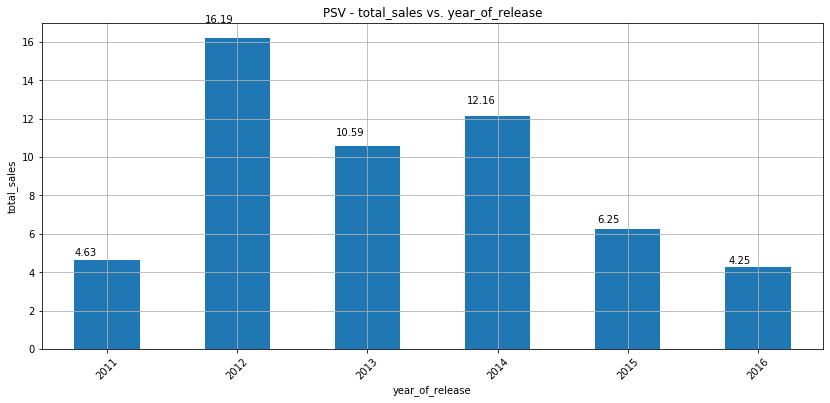

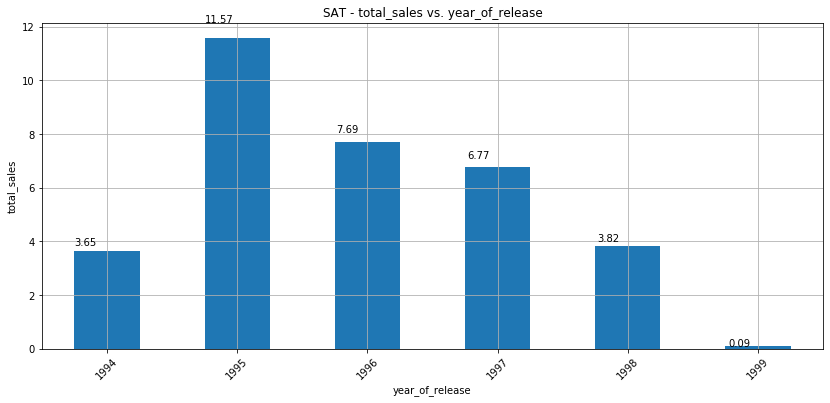

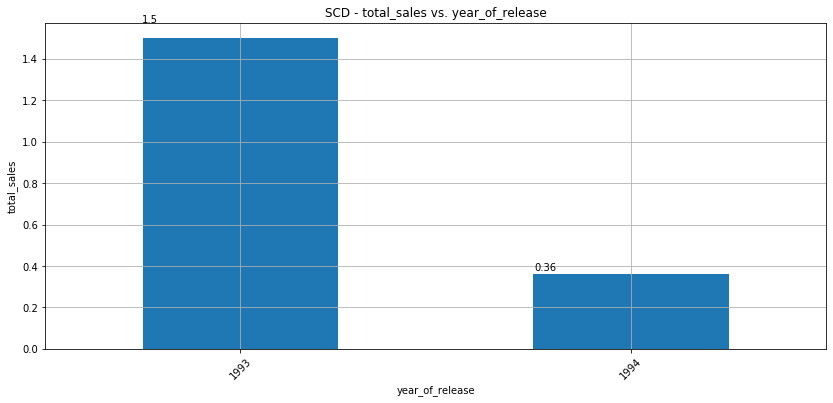

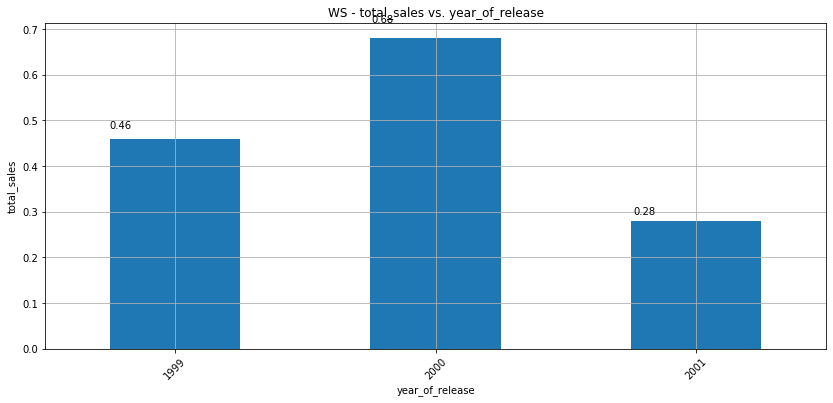

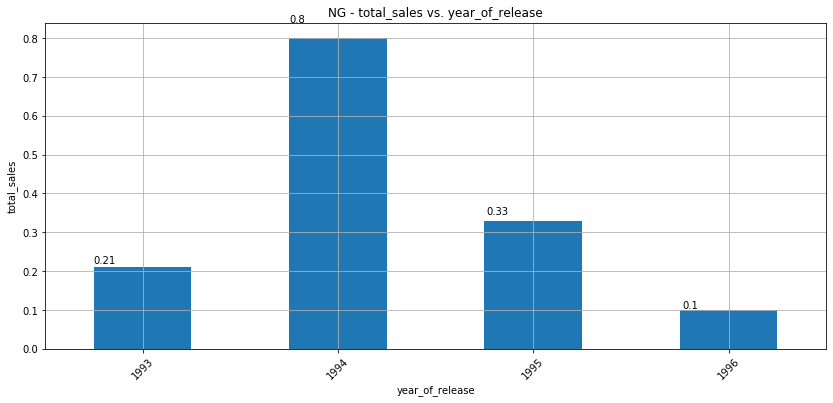

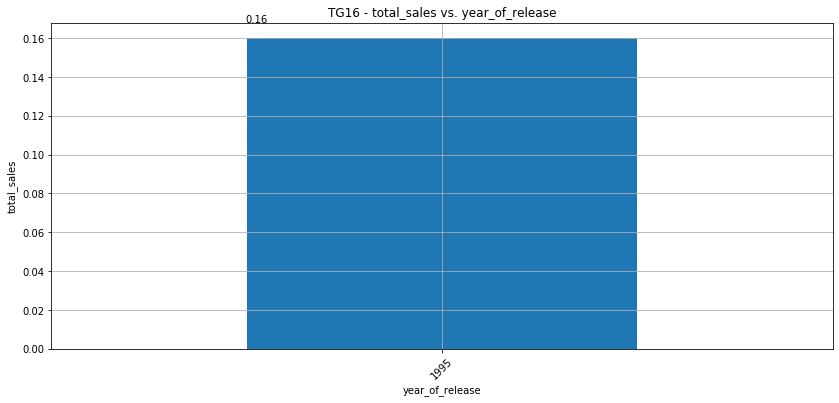

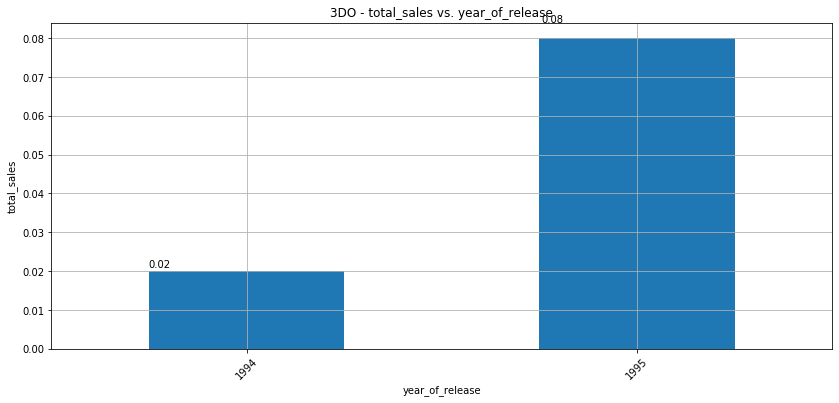

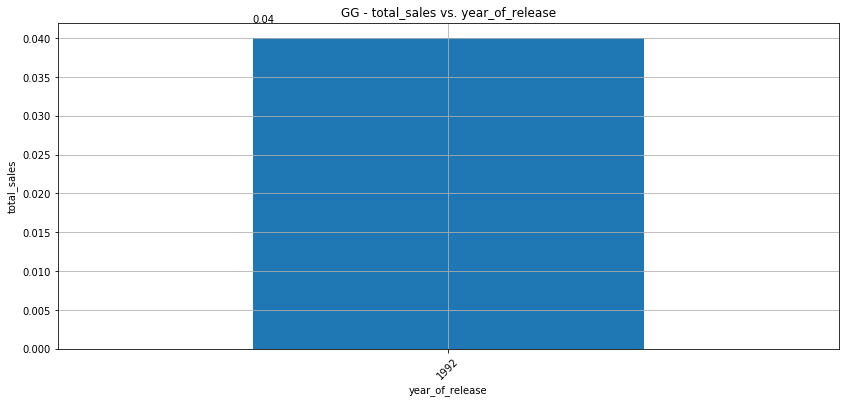

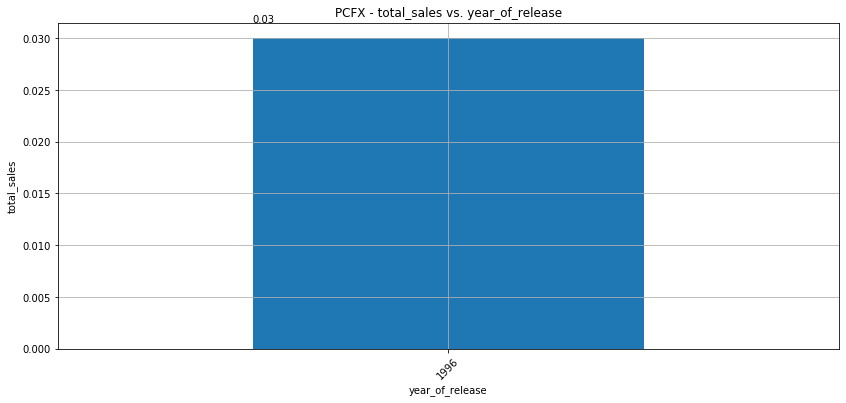

In [ ]:
#collapse-output
# Bar graph for all platforms versus the total sales of games per year

for platform in df_games['platform'].unique():
  plot_bar(df_games, 'year_of_release', 'total_sales', 'platform', platform)
  plt.ylabel('total_sales')

* Wii sales title released started in 2006 but then declined around 2011 and really died down passed that point.

* NES title sales started around 1983 though the sales took off in 1984 spiked in 1985 and then again died down and spiked again in 1988 but died down after that.

* GB title sales started in 1988 but really took off the next year in 1989 but sales seemed to declined after this point (might be due to no new game releases). Sales start increase in 1992 but again there is a decline until 1996 where this is another surge. However, it declines again and then increases for the interval from 1998 to 1999 and declines and stops at 2001. It should be noted that there is no distinction on our data for GB versus GB Color (since both are the same plaform but one was a later release with color resolution). This might explain the long life of sales for this platform.

* DS game sales starts to take off in 2004 and peaks in 2005 staying fairly constant until 2010 when sales start to decline and it really dies off in 2013.

* X360 game sales start in 2005 but really start climbing in 2006 and peaks around 2010 and games sales after this have gradual decline after this point.

* PS3 game sales start at 2006 and climb and peak at 2011 and slowly declines  with sales really dropping after 2014.

* PS2 game sales start in 2000 then stay pretty high in the period between 2001 to 2005. After this point, game sales for the PS2 start really declining in 2006 and stop after 2011.

* SNES game sales start in 1990 and staky fairly constant and peak in 1993. Game sales for SNES start to decline in 1996 and really drop off after this and ends in 1999.

* GBA game sales start in 2000 but really take off in 2001. It stays pretty constant until 2005 where it really starts to decline and sales stop at 2007.

* PS4 game sales start in 2013 but takes off in 2014 and is still pretty constant with our data, however, we can't see past 2016 to really see when sales will start to decline for this the PS4.

* 3DS game sales start off strong in 2011 and there is a slight decline after 2015.

* N64 game sales start in 1996 (which make sense with the decline of SNES in 1996) and take off peaking at 1999. There is decline after 2000 and sales stop after 2002.

* PS game sales start in 1994 and start a gradual climb and peak in 1998 and slowly declines after this point with a sales really stopping in 2003.


---
Quick analysis from the graphs consoles seem to have peak and decline around 4-5 years. General exceptions for these are hand-held consoles (GB, GBA, DS, PSV) and PC and earlier consoles. Platforms/consoles have sales past 4-5 year point might have game titles released on both newer and older platforms. Though from the data, the top 4 selling games releases throughout the years were on the following platforms: PS2, X360, PS3, Wii, DS, and PS



## Determining the actual period with leading platforms

Though we know the platforms with the leading game sales of all time from our data consists of: PS2, X360, PS3, Wii, DS, and PS, these platforms wouldn't really show up for our prognosis for 2017 since these are considered end-of-life already. Though looking at their patterns we can try to forcast the sales for the currently/lastest leading platforms.

Knowing that the lastest platforms seemed to be released around 2013, we should take a look around this period and use the data from the former leading platforms to make a prognosis for 2017.

In [ ]:
df_period = df_games[(df_games['year_of_release'] >= 2013) & (df_games['year_of_release'].notnull())]
df_period.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)

,total_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,144.44
X360,136.80
WiiU,64.63
PC,39.43
PSV,33.25
Wii,13.66


Starting in from 2013 until 2016, it seems like the platform with leading in game sales is PS4. PS3, though coming in second on this list, we need to keep in mind that the sales for this should be in decline do the newer PS4 release.  XOne should follow the same pattern with X360 falling behind in sales with the release of the new platform. Same with 3DS and the DS, WiiU and Wii, PSV and PSP. We should see a decline in sales for the older platforms in 2017. PC is the only platform that would not have newer releases for the platform, though the sales for PC do vary, this might be because of number of title releases for the PC or so other underlying cause.

In [ ]:
# Data slice for top selling game platforms starting from 2013
# Newer platforms
df_ps4 = df_games.query('platform == "PS4" & year_of_release >= 2013')
df_xone = df_games.query('platform == "XOne" & year_of_release >= 2013')
df_3ds = df_games.query('platform == "3DS" & year_of_release >= 2013')
df_wiiu = df_games.query('platform == "WiiU" & year_of_release >= 2013')
df_psv = df_games.query('platform == "PSV" & year_of_release >= 2013')

# Older platforms 
df_ps3 = df_games.query('platform == "PS3" & year_of_release >= 2013')
df_x360 = df_games.query('platform == "X360" & year_of_release >= 2013')
df_ds = df_games.query('platform == "DS" & year_of_release >= 2013')
df_wii = df_games.query('platform == "Wii" & year_of_release >= 2013')
df_psp = df_games.query('platform == "PSP" & year_of_release >= 2013')

Text(0, 0.5, 'total_sales')

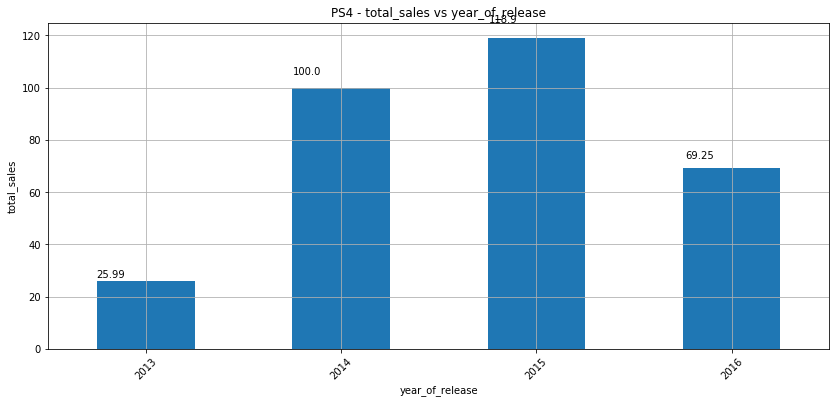

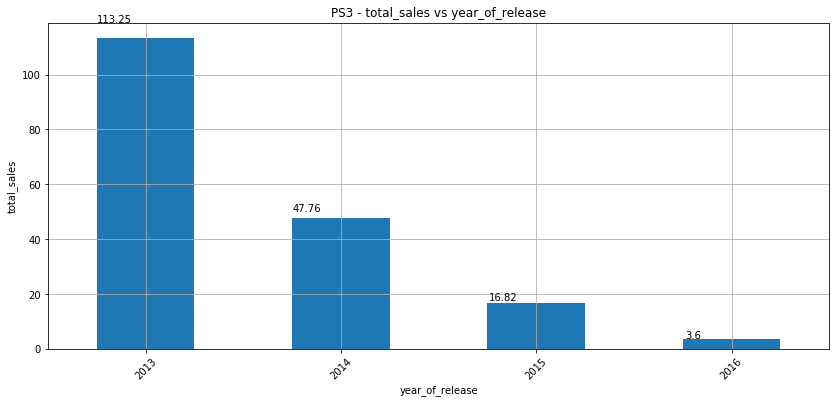

In [ ]:
plot_bar(df_ps4,'year_of_release', 'total_sales')
plt.title('PS4 - total_sales vs year_of_release')
plt.ylabel('total_sales')

plot_bar(df_ps3,'year_of_release', 'total_sales')
plt.title('PS3 - total_sales vs year_of_release')
plt.ylabel('total_sales')

PS4 seemed to have been introduced in 2013 where PS3 seems to be in a height of sales but as expected the sales for PS3 decrease over time and the sames should decrease even more or be close to non-existent in 2017. PS4 sale should be on the raise but since it seems like 2016 data is not complete it's hard to determine if PS4 sales will spike in 2017. 

Text(0, 0.5, 'total_sales')

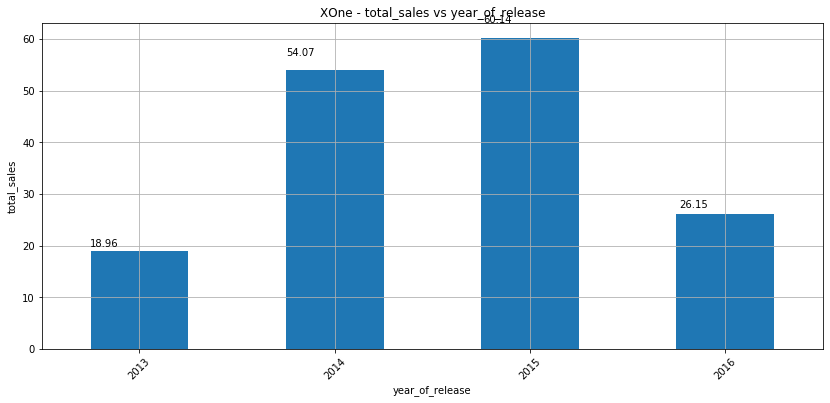

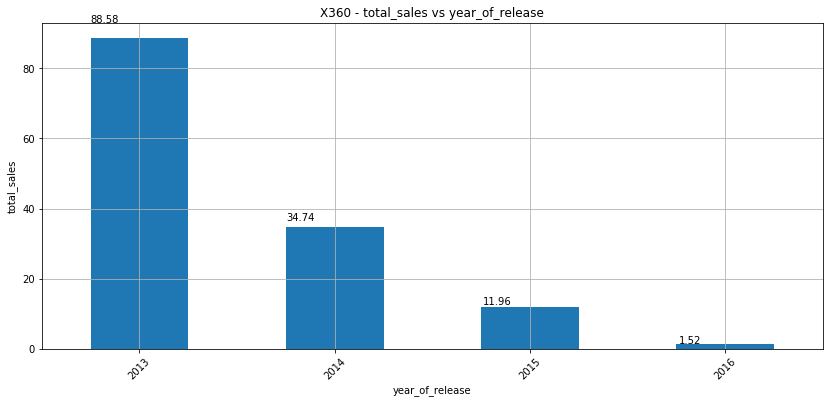

In [ ]:
plot_bar(df_xone,'year_of_release', 'total_sales')
plt.title('XOne - total_sales vs year_of_release')
plt.ylabel('total_sales')

plot_bar(df_x360,'year_of_release', 'total_sales')
plt.title('X360 - total_sales vs year_of_release')
plt.ylabel('total_sales')

Similar to what we see with PS4 vs PS3, XOne and X360 follow the same pattern. With sales for X360 high in 2013 but with the introduction of XOne in 2013 there is a raise in sales for XOne and decline for X360. By 2017, X360 should be similar to PS3 sales. Sales for XOne in 2017 should increase too for 2017 or have as similar raise to that of PS4.

Text(0, 0.5, 'total_sales')

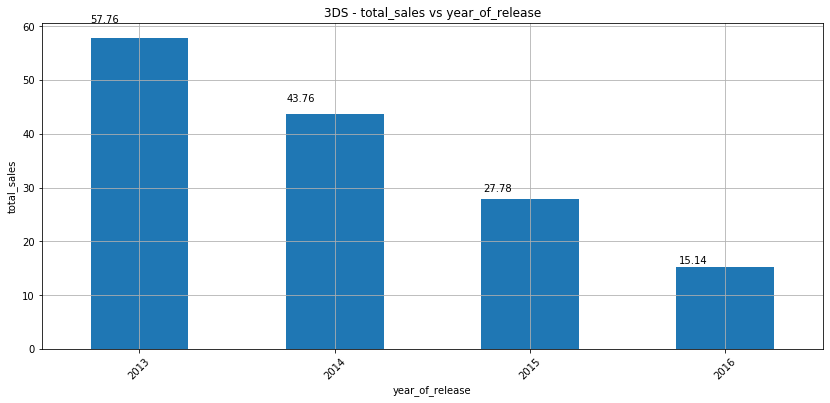

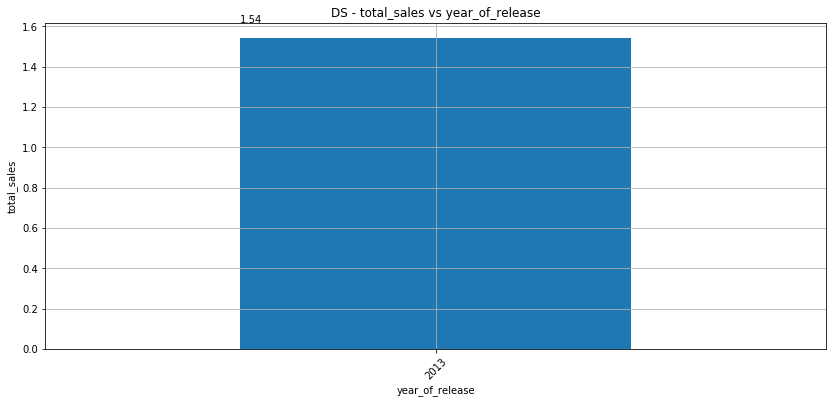

In [ ]:
plot_bar(df_3ds,'year_of_release', 'total_sales')
plt.title('3DS - total_sales vs year_of_release')
plt.ylabel('total_sales')

plot_bar(df_ds,'year_of_release', 'total_sales')
plt.title('DS - total_sales vs year_of_release')
plt.ylabel('total_sales')

It seems as though the hand-held platforms here have a different pattern. The 3DS seems to have peaked sales in 2013 but is on the decline versus the DS which seems like was on it's decline and stopped in 2013 with no data after. for 3DS sales in 2017, it seems like it might decrease a bit more.

Text(0, 0.5, 'total_sales')

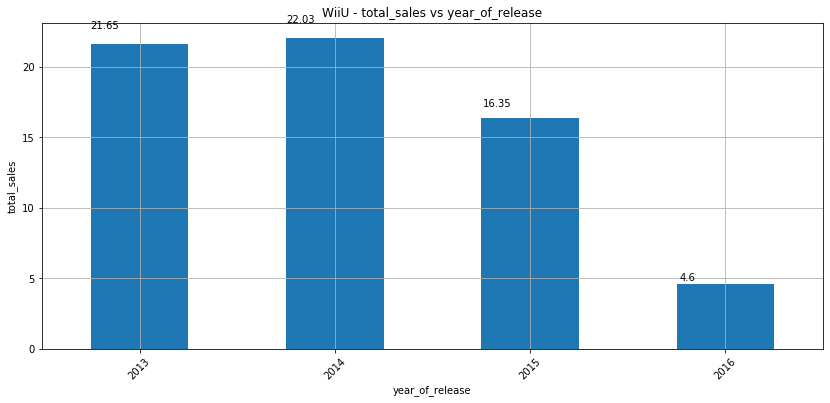

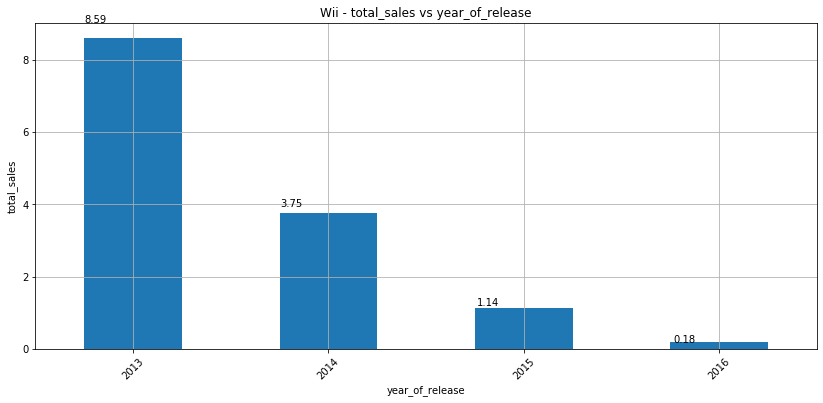

In [ ]:
plot_bar(df_wiiu,'year_of_release', 'total_sales')
plt.title('WiiU - total_sales vs year_of_release')
plt.ylabel('total_sales')

plot_bar(df_wii,'year_of_release', 'total_sales')
plt.title('Wii - total_sales vs year_of_release')
plt.ylabel('total_sales')

Similar to what was seen with the PS4 vs PS3 and XOne vs X360, WiiU and Wii are following the same pattern with the decline of Wii starting in 2013 and the raise of WiiU. Though it seems like WiiU is declining and this might be do to lack of new title releases for the platform. Though for Wii in 2017, it seems like the platform will cease sales.

Text(0, 0.5, 'total_sales')

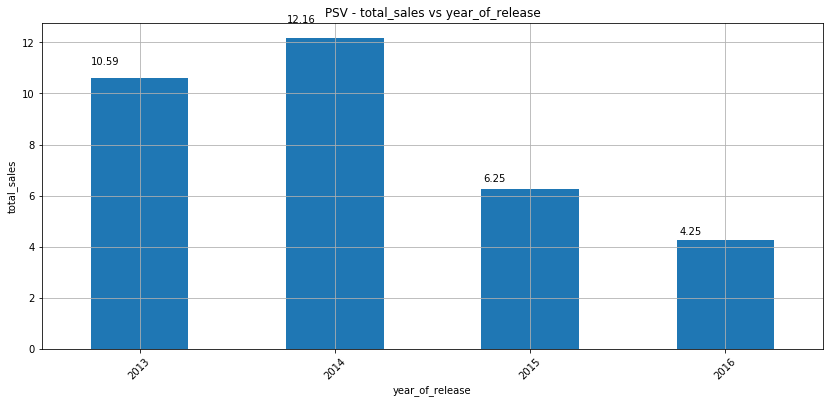

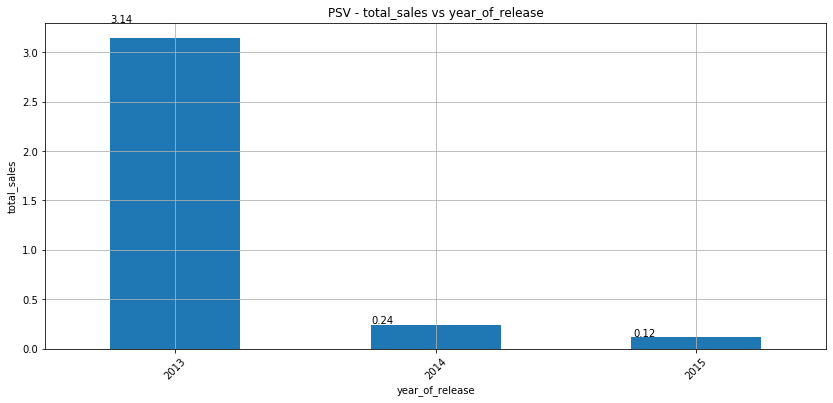

In [ ]:
plot_bar(df_psv,'year_of_release', 'total_sales')
plt.title('PSV - total_sales vs year_of_release')
plt.ylabel('total_sales')

plot_bar(df_psp,'year_of_release', 'total_sales')
plt.title('PSV - total_sales vs year_of_release')
plt.ylabel('total_sales')

Similar to what we have seen with newer platforms being introduced, the PSP sales decreased after 2013 and ceased in after 2015. PSV has a slight decline as well but this might be do to lack of new title realeses for the platform. Interesting enough, this is also a hand-held platform and from what was seen above with 3DS vs DS it seems like the older platform sales for these really do come to a quick stop in sales after introduction of a new platform versus the other platforms.

---

The leading platforms that we would see sales in 2017 are: PS4, XOne, 3DS, WiiU, PSV, and PC. These platforms are the lastest and most current platforms to date. So long as new game titles are released we should see the sales stay stable or grow. With anticipation of new platforms, ever 5-6 years or so we need to keep in mind that these platforms were newly introduced around 2013 so close to 2017 we might see a decrease in sales as well as we are past the point of peaking sales. Thought the hand-held consoles (PSV and 3DS) it's hard to determine their end-of-life as they vary slightly compared to the other platforms. PC sales will stay mostly consistent as there is no threat of new platforms.

The platforms that have reached their end-of-life (shrinking in sales) are: PS3, X360, and Wii. As we saw from above, the introduction of new platforms brought the decline to these older platforms. For the hand-held platforms (PSP and DS) sales declined and came to a halt much more sudden than the other platforms. Since these older platforms still have little sales, we might see a halt of sales in 2017.


## Distribution of global sales by platform

[(0, 4)]

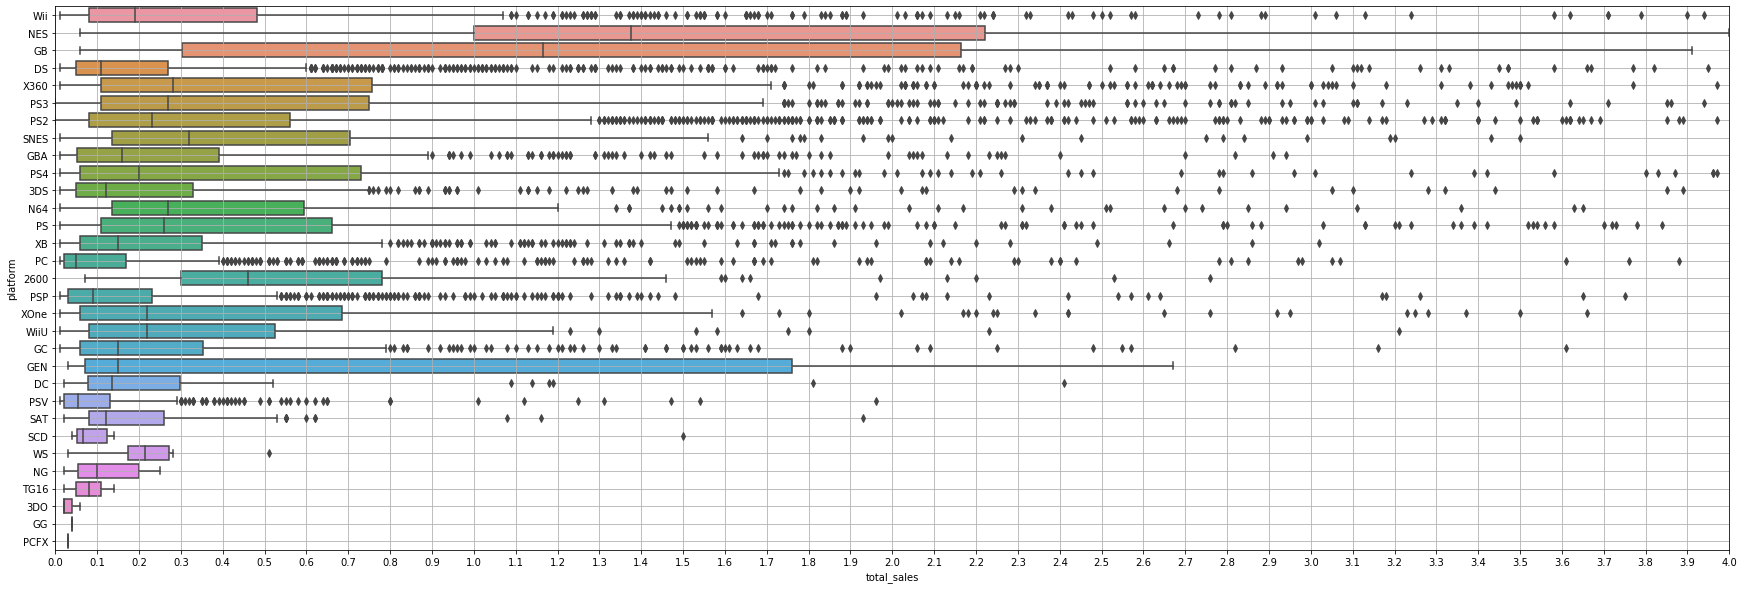

In [ ]:
plt.figure(figsize=(30,10))
ax = sns.boxplot(x=df_games['total_sales'], y=df_games['platform'])
ax.yaxis.grid(True) # Show the horizontal gridlines
ax.xaxis.grid(True) # Show the vertical gridlines
ax.xaxis.set_major_locator(ticker.MultipleLocator(.1))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.set(xlim=(0, 4))

There is a difference in range for all the game sales per platform across the globe.It seems like the median for NES game sales is the highest at about 1.38 million USD compared to the other platforms. GB game median game sales comes second next to the NES at about 1.16 million USD. There are some game sales that are significantly outside quartile on the right. These games must be best sellers to have a big right skew outside the quartile.



In [ ]:
display(df_games.sort_values(by='total_sales', ascending=False).head(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,69.0,7.7,E,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,74.0,7.8,T,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,70.0,7.5,E,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,73.0,7.4,M,28.31


Wii Sports seems to be the top selling game overall from our data at 82.54 million USD on the Wii platform. Super Mario Bros comes in second at 40.24 million USD on the NES.

In [ ]:
pd.pivot_table(df_games, values='total_sales', index='platform', aggfunc={'sum' , 'median', 'mean'}).sort_values(by='mean', ascending=False)

,mean,median,sum
platform,,,
GB,2.606735,1.165,255.46
NES,2.561735,1.375,251.05
GEN,1.061034,0.150,30.77
SNES,0.836987,0.320,200.04
PS4,0.801378,0.200,314.14
X360,0.769746,0.280,971.42
2600,0.729173,0.460,96.98
PS3,0.705973,0.270,939.65
Wii,0.687508,0.190,907.51


GB platform has the highest mean value at 2.6 million USD and like we saw above with the boxplot the second highest median value at 1.65 million USD. NES comes in second with the highest mean value of 2.56 million USD and the highest overall median at 1.37 million USD. Though, the highest selling game sales is found in PS2 platform at 1255.77 million USD but the mean value for this is 0.58 million USD and median is 0.23 million USD. The distribution for these values are pretty interesting in terms of sum of top selling versus the mean and median values. 

---
Overall, the median values are lower compared to the mean values for game sales per platform.


## impact of user and critic feedback on sales


In [ ]:
# Looking at Wii platform at user and critic scores

wii = df_games.query('platform == "Wii"')

print('***critic_score median:', wii['critic_score'].median())
display(wii['critic_score'].describe())

print('\n***user_score median:', wii['user_score'].median())
display(wii['user_score'].describe())

***critic_score median: 69.0


count    1320.000000
mean       67.103030
std        10.823695
min        19.000000
25%        66.000000
50%        69.000000
75%        73.000000
max        97.000000
Name: critic_score, dtype: float64


***user_score median: 7.4


count    1320.000000
mean        7.107197
std         1.183492
min         0.200000
25%         7.100000
50%         7.400000
75%         7.600000
max         9.300000
Name: user_score, dtype: float64

The `critic_score` and `user_score` are close in mean and median values if we scale the `critic_score` to match `user_score`. Overall, the `user_score` seems to have a higher scoring compared to the `critic_score`.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 1.0, 'critic_score and user_score on the Wii per total sales')

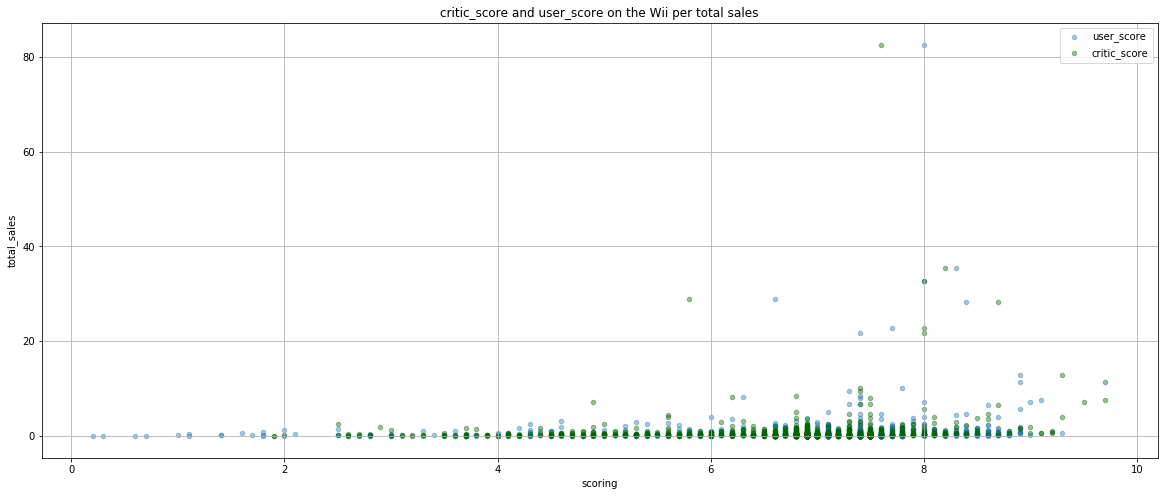

In [ ]:
# Scale critic_score to user_score
wii['critic_score_scale'] = wii['critic_score'] / 10.0

ax = wii.plot.scatter(x='user_score', y='total_sales', label='user_score', figsize=(20,8), alpha=0.4)
wii.plot.scatter(x='critic_score_scale', y='total_sales', color='DarkGreen', label='critic_score', ax=ax, alpha=0.4)
plt.legend()
plt.grid(True)
plt.xlabel('scoring')
plt.title("critic_score and user_score on the Wii per total sales")


Looking at the scatter plot it doesn't seem like there is a linear correlation relationship between scoring and sales. Though, we do see a huge rating around 7-8 scoring range where there is a spike in total_sales but this seems like it's only for a certain game title as sales don't remain this high as we move higher on the scoring. From the scatter plot, there is a slight increase in `total_sales` with increase of rating/scoring with both critic and user, which would make sense as popular game titles I imagine would have higher ratings/scoring from both critics and users.

In [ ]:
print('critic_score correlation calculation:', '{:.1%}'.format(wii['critic_score'].corr(wii['total_sales'])))
print('user_score correlation calculation:', '{:.1%}'.format(wii['user_score'].corr(wii['total_sales'])))

critic_score correlation calculation: 11.1%
user_score correlation calculation: 6.2%


There doesn't seem to be a significant correlation between scoring/rating and sales from the linear correlation calculation. Though `critic_score` seems to have a higher influence than `user_score`.

---

Overall, `critic_score` and `user_score` doesn't seem to have a linear correlation with total_sales. Though from our scatter plot, it does seem like there is a relationship with scoring and total sales as it seeems like there is a higher density of total sales with higher scoring/rating. critic_score seems to have a higher influence in total_sales compared to user_score.


## Compare the sales of the same games on other platforms

In [ ]:
cross_platform = set(df_period.groupby(['name']).filter(lambda x: x.shape[0] > 1)['name']) #List of unique games that are cross-platform

df_popular_games = df_period.query('name in @cross_platform').groupby(['name', 'platform']).agg({'total_sales': 'sum'})
df_popular_games.sort_values(by='total_sales', ascending=False, inplace=True)

df_popular_games.query('total_sales > 6').head(10)

total_sales
name                           platform             
Grand Theft Auto V             PS3             21.05
                               X360            16.27
Call of Duty: Black Ops 3      PS4             14.63
Grand Theft Auto V             PS4             12.62
Call of Duty: Ghosts           X360            10.24
                               PS3              9.36
Minecraft                      X360             9.18
FIFA 16                        PS4              8.58
Star Wars Battlefront (2015)   PS4              7.98
Call of Duty: Advanced Warfare PS4              7.66

Across platforms starting from 2013, PS4 seems to be the most popular platfrom and second to that is X360. Most popular being Grand Theft Auto V on PS3, X360, and PS4. All other games seem to fall for PS4 for popularity.

## Distribution of games by genre

Text(0, 0.5, 'total_sales')

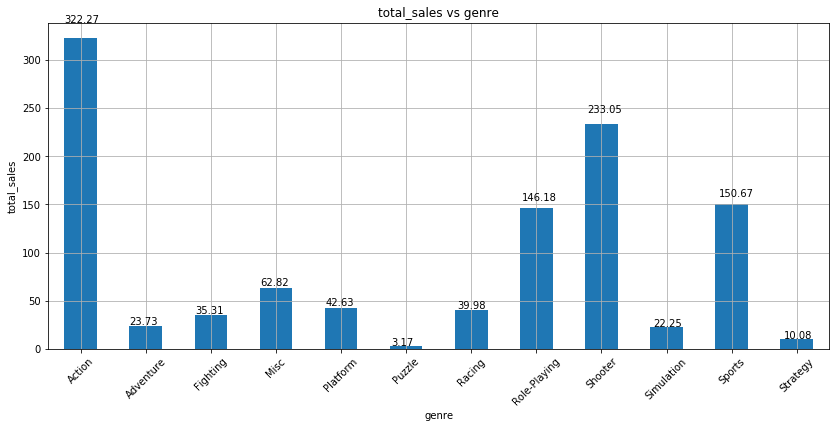

In [ ]:
genres = df_period.groupby('genre').agg({'total_sales': 'sum'}).sort_values(by='total_sales', ascending=False)

plot_bar(genres,'genre', 'total_sales')
plt.title('total_sales vs genre')
plt.ylabel('total_sales')

From the start of 2013, the most popular genre of game sold overall is Action. Second would be Shooter and then Sport and Role-Playing come close to thrid and fourth.

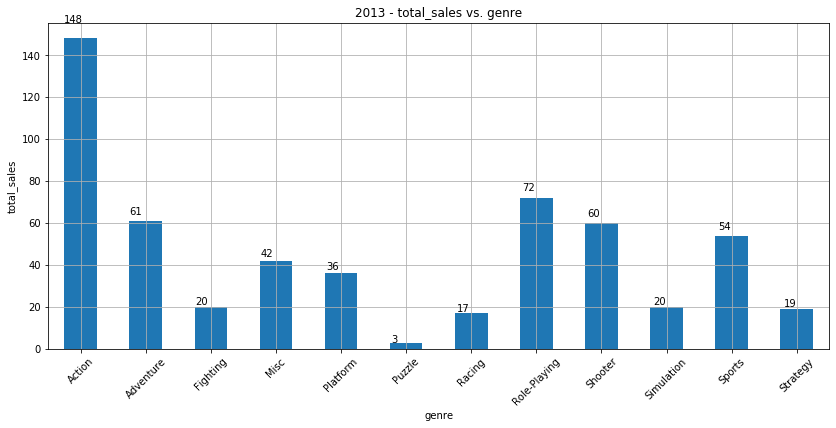

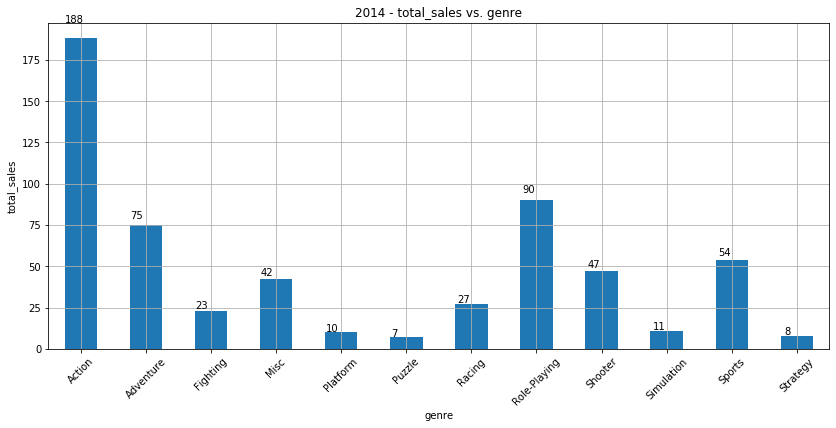

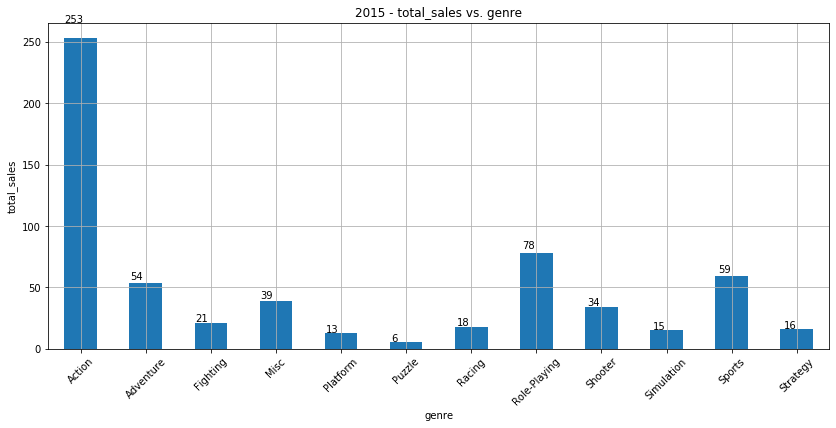

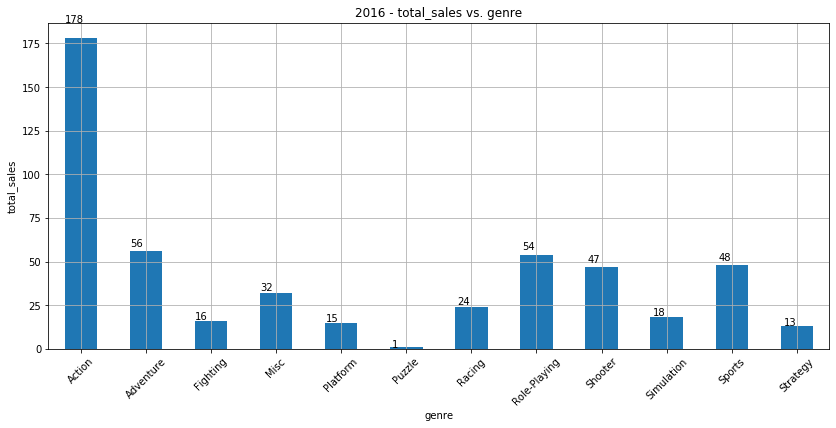

In [ ]:
#Taking a closer look at each year starting from 2013 and genre of games sold
for year in [2013 + i for i in range(4)]:
  plot_bar(df_period, 'genre', 'total_sales', column='year_of_release', value=year, func='count')
  plt.ylabel('total_sales')

*  2013 the most popular genre was Action followed by Role-Playing with Adventure and Shooter close in sales.

*  2014 similar to what was seen in 2013, Action was the top selling genre with Role-Playing falling second and Adventure being in the top 3. Sports came in at fourth place.

*  2015 was by far the top selling genre with count sold being over 200 which is much different from what we saw previously. 

*  2016 has a similar pattern to 2013 and 2014 with Action being top selling. 

---

Action is the top selling genre overall. All other genre seem to stay moderately the same with sales though Shooter seems to fluctuate along with Adventure throughout the changing years. This might be due to number of releases per year per genre. Puzzle remains the lowest selling genre overall. 


# Statistical Data Analysis

## Create a user profile for each region

In [ ]:
regions = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']

for region in regions:
  print(region.title())
  display(df_period.pivot_table(index='platform', values=region, aggfunc='sum').sort_values(by=region, ascending=False).head())
  display(df_period.pivot_table(index='genre', values=region, aggfunc='sum').sort_values(by=region, ascending=False).head())
  display(df_period.pivot_table(index='rating', values=region, aggfunc='sum').sort_values(by=region, ascending=False).head())
  print('******'*10, '\n')

Na_Sales


,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,39.04


,na_sales
genre,
Action,126.23
Shooter,109.78
Sports,65.27
Role-Playing,46.51
Misc,27.49


,na_sales
rating,
M,184.77
E,102.49
T,96.90
E10+,54.50


************************************************************ 

Eu_Sales


,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,31.17


,eu_sales
genre,
Action,118.32
Shooter,87.88
Sports,60.52
Role-Playing,37.02
Racing,20.19


,eu_sales
rating,
M,162.21
E,108.39
T,79.01
E10+,42.88


************************************************************ 

Jp_Sales


,jp_sales
platform,
3DS,67.86
PS3,23.35
PSV,18.66
PS4,15.96
WiiU,10.88


,jp_sales
genre,
Role-Playing,51.14
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61


,jp_sales
rating,
T,86.72
E,33.37
M,14.92
E10+,5.89


************************************************************ 

Other_Sales


,other_sales
platform,
PS4,48.35
PS3,26.77
XOne,14.27
X360,12.11
3DS,6.37


,other_sales
genre,
Action,37.23
Shooter,28.78
Sports,19.45
Role-Playing,11.51
Misc,6.09


,other_sales
rating,
M,52.82
E,28.97
T,25.69
E10+,12.61


************************************************************ 



NA region:
*   For the period starting from 2013, PS4 is the top selling platform with XOne, X360 and PS3 trailing behind and 3DS being at the bottom. 
*   Action being to top genre, and Shooter, Sports, and Role-Playing falling behind. 
*   M rating is top rating with E and T behind that.
	
EU region:
*   For the period starting from 2013, PS4 is the top selling platform with PS3, XOne, X360 and 3DS falling behind in that order. 
*   Top selling genres are similar order to NA with Action being the best genre, Shooter, Sports and Role-Playing falling behind. Different from NA though is Racing genre rather than Misc genre compared to NA. 
*   Same pattern as we saw with NA the rating comes with M being top selling and E and T falling behind that. 
	
JP region:
*   Different from what we see with NA and EU the top selling platform in JP is 3DS. PS3, PSV, PS4, and WiiU falling behind the 3DS which is much different from NA and EU region. The hand-held platforms are much more dominate in JP and no XOne or X360 found in sales. 
*   Another difference we see here compared to NA and EU region with genre, Role-Playing is the top selling genre with Action, Misc, Fighting, and Shooter on the bottom.
*   Another difference from NA and EU region is with the rating in JP, T is the top selling genre and E and M being behind that.

Other region:
*   Similar to what NA and EU region, PS4 is the top selling platform. PS3, XOne, X360, and 3DS trailing behind.
*   Again similar to NA and EU region, Action is the top selling genre. Following behind is Shooter, Sports, Role-Playing, and Misc.
*   Same pattern we see with NA rating, M is the top selling rating of games and E and T follow behind M.

---
Interesting that most of the regions have similar patterns for top selling platforms, genre, and rating except for JP. JP doesn't even have the XBox series platform in the top selling. Also, having 3DS and PSV as top selling, it seems like hand-held platforms are more popular in JP than other regions. Genre is different in JP as well compared to other regions and again this might be do to 3DS being the top selling. 

## Hypotheses testing

### Null hypothesis vs Alternative hypothesis and Significance level

Null hypothesis is believed to a be a true statement. The alternative hypothesis is formulated to disprove the null hypothesis with at least one statisical representation example that makes the null hypothesis false. Since the null hypothesis would be false it has to be rejected. 

Alternative hypothesis is usually the mathematical opposite of the null hypothesis.

We choose a significance level of 0.05 which indicates a 5% risk of concluding that a difference exists when there is no actual difference. Anything higher seems like it would be risky.

### Testing if average user ratings of the Xbox One and PC platforms are the same.

---

Null hypothesis: The average user rating of Xbox One and PC platforms **do not differ**.

Alternative hypothesis: The average user rating of Xbox One and PC platforms **do differ**.

---

The alternative hypothesis will be tested to disprove the null hypothesis.

What to test:
* Compare the averages/means user rating from both XOne and PC, if they are off by an alpha (that we specify) this means we could reject the null hypothesis.

In [ ]:
# Getting user rating for XOne and PC
xone_user_rating = df_games.query('platform == "XOne"')['user_score']
pc_user_rating = df_games.query('platform == "PC"')['user_score']

print("Average user rating for XOne: ", xone_user_rating.mean(),
      "\nAverage user rating for PC: ", pc_user_rating.mean())

Average user rating for XOne:  6.7615384615384615 
Average user rating for PC:  7.16170431211499


In [ ]:
# Testing the null/alternative hypothesis

alpha = 0.05 #critical statistical significance

results = st.ttest_ind(
        xone_user_rating, 
        pc_user_rating)

print('p-value: ', results.pvalue,
      '\nalpha: ', alpha)

if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")

p-value:  3.5341366694379986e-05 
alpha:  0.05
We reject the null hypothesis


Mathematically, it was proven that **the average user rating from XOne and PC do differ.** The t-test confirms that it appears that these ratings are differ.

With means of:
*   Average user rating for XOne:  6.761538461538461 
*   Average user rating for PC:  7.161704312115005

### Testing if average user ratings for the Action and Sports genres are different.

---

Null hypothesis: The average user ratings for the Action and Sports genres **do not differ**.

Alternative hypothesis: The average user ratings for the Action and Sports genres **do differ**.

---

The alternative hypothesis will be tested to disprove the null hypothesis.

What to test:
* Compare the averages/means user rating from both Action and Sports genres, if they are off by an alpha (that we specify) this means we could reject the null hypothesis.

In [ ]:
# Getting user rating for Action and Sports genre
action_user_rating = df_games.query('genre == "Action"')['user_score']
sports_user_rating = df_games.query('genre == "Sports"')['user_score']

print("Average user rating for Action genre: ", action_user_rating.mean(),
      "\nAverage user rating for Sports genre: ", sports_user_rating.mean())

Average user rating for Action genre:  7.21208073612348 
Average user rating for Sports genre:  7.193867120954002


In [ ]:
# Testing the null/alternative hypothesis

alpha = 0.05 #critical statistical significance

results = st.ttest_ind(
        action_user_rating, 
        sports_user_rating)

print('p-value: ', results.pvalue,
      '\nalpha: ', alpha)

if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")

p-value:  0.5342570517131008 
alpha:  0.05
We can't reject the null hypothesis


Mathematically, it was proven that **the average user rating from Action genre and Sports do not differ**, since we are not able to reject the null hypothesis. The t-test confirms that it appears that these ratings are similar.

With means of:
*   Average user rating for Action genre:  7.212080736123694 
*   Average user rating for Sports genre:  7.193867120953876

The average/means are pretty similar between Action and Sports genres.

---

With the t-test and an alpha of 0.05, we were able to prove that the average user rating from XOne and PC do differ and also with seperate t-test we concluded that the average user rating from Action genre and Sports do not differ.

# Conclusion

* `critic_score` and `user_score` had lots of missing values which may have caused influences in the analysis with how we decided to fill in those values. 

* Using similar genre with the game titles, we were able to generate a relevant rating for the game titles that had missing values. 

* Overall, PS2 had the highest selling games titles for it's platform with the data provided. 

* The typical lifespan of a platform ranges from 5-6 years, as this seems to be where new platforms are announced and introduced to the market. Then it takes about 2-3 years for the older platform to become irrelevant after the introduction to the newer platform.

* Action is the top selling genre of games overall, though it gets interesting when we take a closer look at the regions where it seems to differ in some regions.

* NA Region: the top selling platform is PS4, top selling genre is Action, and top selling rating of games is M.

* EU Region: the top selling platform is PS4, top selling genre is Action, and top selling rating of games is M.

* JP Region: the top selling platform is 3DS, top selling genre is Role-Playing, and top selling rating of games is T followed behind by E.


---

It's interesting overall to see that hand-held consoles are more popular in Japan versus other places in the world and also that the XBox series is not targeted towards those in Japan at all but is everywhere else in the world. Also, with the rating being M being top selling in NA and EU it does seem like shooter games are more popular in these regions vs what is seen in JP. This seems like there is a cultural influence with game sells and their target audience.
